In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

/Users/quansun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mnist = input_data.read_data_sets("./MNIST", one_hot = True)

Extracting ./MNIST/train-images-idx3-ubyte.gz
Extracting ./MNIST/train-labels-idx1-ubyte.gz
Extracting ./MNIST/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/t10k-labels-idx1-ubyte.gz


In [5]:
print(mnist.train.images.shape)

(55000, 784)


In [6]:
print(mnist.train.labels.shape)

(55000, 10)


In [7]:
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

55000
5000
10000


In [8]:
def weight(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, padding='SAME'):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = padding)

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')

In [10]:
batch_size = 64
epochs = 10000
lr = 0.01
C1 = 32 #1st conv 
C2 = 64 #2st conv 
C3 = 512

x = tf.placeholder(tf.float32, [None, 28*28])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = weight([5,5,1,C1])
b_conv1 = bias([C1])
h_conv1 = conv2d(x_image, W_conv1) + b_conv1
h_conv1 = tf.nn.relu(h_conv1)
h_pool1 = max_pool_2x2(h_conv1) # 14*14*C1

W_conv2 = weight([5,5,C1,C2])
b_conv2 = bias([C2])
h_conv2 = conv2d(h_pool1, W_conv2) + b_conv2
h_conv2 = tf.nn.relu(h_conv2)
h_pool2 = max_pool_2x2(h_conv2) # 7 * 7 * C2

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*C2])
W_fc = weight([7*7*C2, C3])
b_fc = bias([C3])
h_fc = tf.matmul(h_pool2_flat, W_fc) + b_fc
h_fc = tf.nn.relu(h_fc)

p_keep = tf.placeholder(tf.float32)
h_fc = tf.nn.dropout(h_fc, p_keep)

W_out = weight([C3, 10])
b_out = bias([10])
y_pred = tf.matmul(h_fc, W_out) + b_out

y_gt = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred, labels=y_gt))

optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_gt, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
""""def random_batch(train_images, train_labels, batch_size):
    num_images = len(train_images)
    idx = np.random.choice(num_images, size=batch_size, replace=False)
    batch_x = train_images[idx]
    batch_y = train_labels[idx]
    return batch_x, batch_y"""

'"def random_batch(train_images, train_labels, batch_size):\n    num_images = len(train_images)\n    idx = np.random.choice(num_images, size=batch_size, replace=False)\n    batch_x = train_images[idx]\n    batch_y = train_labels[idx]\n    return batch_x, batch_y'

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

mnist.train.images.reshape([55000, 28, 28, 1])
mnist.validation.images.reshape([5000, 28, 28, 1])
mnist.test.images.reshape([10000, 28, 28, 1])

for iter in range(epochs):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={x:batch_x, y_gt:batch_y, p_keep:0.5})
    if iter%100 == 0:
        train_loss = sess.run(loss, feed_dict={x:batch_x, y_gt:batch_y, p_keep:1.0})
        train_accuracy = sess.run(accuracy, feed_dict={x:batch_x, y_gt:batch_y, p_keep:1.0})
        
        validation_x = mnist.validation.images
        validation_y = mnist.validation.labels
        validation_accuracy = sess.run(accuracy, feed_dict={x:validation_x, y_gt:validation_y, p_keep:1.0})
        print("Iter %d, training loss %f, training accuracy %f, validation accuracy %f" % (iter, train_loss, train_accuracy, validation_accuracy))
        
        test_x = mnist.test.images
        test_y = mnist.test.labels
        test_accuracy = sess.run(accuracy, feed_dict={x:test_x, y_gt:test_y, p_keep:1.0})
        print("Test accuracy: %f" % test_accuracy)

Iter 0, training loss 5.835118, training accuracy 0.250000, validation accuracy 0.162600
Test accuracy: 0.174500
Iter 100, training loss 0.284190, training accuracy 0.921875, validation accuracy 0.929400
Test accuracy: 0.931200
Iter 200, training loss 0.176236, training accuracy 0.953125, validation accuracy 0.965200
Test accuracy: 0.963300
Iter 300, training loss 0.036065, training accuracy 1.000000, validation accuracy 0.974200
Test accuracy: 0.970000
Iter 400, training loss 0.164722, training accuracy 0.968750, validation accuracy 0.974800
Test accuracy: 0.974300
Iter 500, training loss 0.010226, training accuracy 1.000000, validation accuracy 0.977800
Test accuracy: 0.979200
Iter 600, training loss 0.021275, training accuracy 0.984375, validation accuracy 0.978200
Test accuracy: 0.980400
Iter 700, training loss 0.064804, training accuracy 0.984375, validation accuracy 0.979200
Test accuracy: 0.980800
Iter 800, training loss 0.108168, training accuracy 0.968750, validation accuracy 

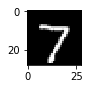

Ground Truth is: 7
Model Prediction: 7


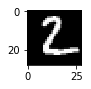

Ground Truth is: 2
Model Prediction: 2


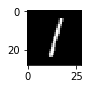

Ground Truth is: 1
Model Prediction: 1


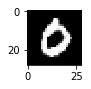

Ground Truth is: 0
Model Prediction: 0


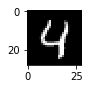

Ground Truth is: 4
Model Prediction: 4


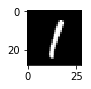

Ground Truth is: 1
Model Prediction: 1


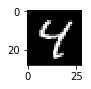

Ground Truth is: 4
Model Prediction: 4


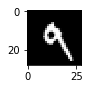

Ground Truth is: 9
Model Prediction: 9


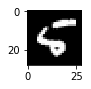

Ground Truth is: 5
Model Prediction: 5


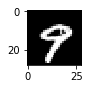

Ground Truth is: 9
Model Prediction: 9


In [44]:
import matplotlib.pyplot as plt
for i in range(10):
    img = mnist.test.images[i]
    label = mnist.test.labels[i]
    
    plt.figure(figsize=(1,1))
    plt.imshow(img.reshape([28,28]), cmap='gray')
    plt.show()
    cls = np.argmax(label)
    print("Ground Truth is:", cls)
    
    pred_label = sess.run(y_pred, feed_dict={x:img.reshape([-1,28*28]), p_keep:1.0})
    pred_cls = np.argmax(pred_label)
    print("Model Prediction:", pred_cls)
    